* Ref : https://datascienceschool.net/

## 1. Equality Constrained Optimization

### 1) Problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Minimize $f(x_1, x_2) = 2x_1^2+x_2^2$  
Subject to : $x_1+x_2=1$

In [2]:
def f(x1, x2):
    return 2*x1 ** 2 + x2 ** 2

def g(x1):
    return 1 - x1 

### 2) Visualization

In [3]:
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = f(X1, X2)

# constraint function g(x) = x1 + x2 - 1 = 0
x2_g = g(x1)

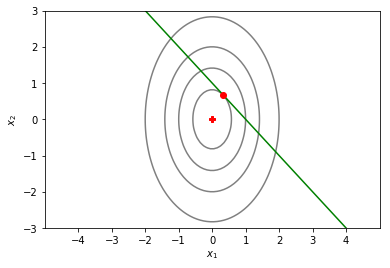

In [4]:
plt.contour(X1, X2, Y, colors="gray", levels=[2/3, 2, 4, 8])
plt.plot(x1, x2_g, 'g-')

plt.plot([0], [0], 'rP') # Zero
plt.plot([1/3], [2/3], 'ro') # Answer

plt.xlim(-5, 5)
plt.ylim(-3, 3)
plt.xticks(np.linspace(-4, 4, 9))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

### 3) Solve with fmin_slspq

In [5]:
import scipy as sp
from scipy import optimize

In [6]:
sp.__version__

'1.2.1'

In [7]:
def farray(x):
    return 2*x[0] ** 2 + x[1] ** 2

def eq_constraint(x):
    return x[0] + x[1] - 1

sp.optimize.fmin_slsqp(farray, np.array([1, 1]), eqcons=[eq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.6666666666666667
            Iterations: 4
            Function evaluations: 16
            Gradient evaluations: 4


array([0.33333333, 0.66666667])

## 2. Inequality Constrained Optimization

### 1) Problem

Minimize $f(x_1, x_2) = (x_1-2)^2+2(x_2-1)^2$  
Subject to : $x_1+4x_2 \leq 3, x1 \geq x2$

In [8]:
def f(x1, x2):
    return (x1 - 2) ** 2 + 2*(x2 - 1) ** 2

def g1(x1):
    return (3-x1)/4

def g2(x1):
    return x1 

### 2) Visualization

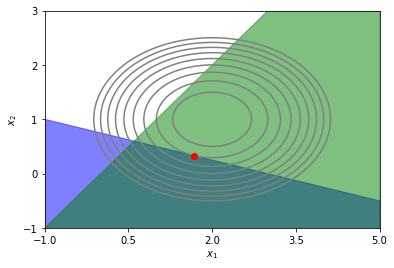

In [9]:
x1 = np.linspace(-2, 5, 100)
x2 = np.linspace(-1.5, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = f(X1, X2)

x2_g1 = g1(x1)
x2_g2 = g2(x1)

plt.contour(X1, X2, Y, colors="gray",
            levels=np.arange(0, 5, 0.5))

plt.plot([5/3], [1/3], 'ro') # Answer

ax = plt.gca()
ax.fill_between(x1, x2_g1, -100, color='b', alpha=0.5)
ax.fill_between(x1, x2_g2, -100, color='g', alpha=0.5)

plt.xlim(-1, 5)
plt.ylim(-1, 3)
plt.xticks(np.linspace(-1, 5, 5))
plt.yticks(np.linspace(-1, 3, 5))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

### 3) Solve with fmin_slspq

In [10]:
def farray(x):
    return (x[0] - 2) ** 2 + 2*(x[1] - 1) ** 2

def ieq_constraint1(x):
    return 3-(x[0]+4*x[1]) # >=0

def ieq_constraint2(x):
    return x[0]-x[1] # >=0

sp.optimize.fmin_slsqp(farray, np.array([0, 0]), ieqcons=[ieq_constraint1, ieq_constraint2])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.0000000000000053
            Iterations: 4
            Function evaluations: 16
            Gradient evaluations: 4


array([1.66666666, 0.33333333])